# Assignment 2 Group 15 Data Visualization<br>
## Index
1. Import Requirements
2. 

In [63]:
## Import requirements
from elasticsearch import Elasticsearch
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from scipy.interpolate import griddata

In [64]:
## Collect data from ElasticSearch
from elasticsearch import helpers

ELASTIC_SEARCH_SERVER= "https://localhost:9200"
es = Elasticsearch(ELASTIC_SEARCH_SERVER, basic_auth=("elastic", "elastic"), verify_certs=False)

# Test the elastic cluster health
try:
    health = es.cluster.health()
    print("Cluster health:", health)
except Exception as e:
    print(f"Error connecting to Elasticsearch: {e}")

# Indexs of data
weather_index = "weather-data1"
traffic_index_2023 = "traffic-2023"
income_index = "all_states_income-data"

index_list = [weather_index, traffic_index_2023, income_index] 

# Create empty lists for weather, income, and traffic data
weather_data = []
income_data = []
traffic_2023_data = []

for ind in index_list:
    # Initialize the scroll
    response = es.search(
        index=ind,
        body={
            'query': {
                'match_all': {}
            }
        },
        scroll='2m',  # Scroll context time
        size=10000    # Number of documents per batch
    )
    
    # Get the scroll ID
    scroll_id = response['_scroll_id']
    scroll_size = len(response['hits']['hits'])
    
    # Keep fetching data until the scroll is done
    while scroll_size > 0:
        # Append the current batch of hits to the corresponding list
        if ind == weather_index:
            weather_data.extend([hit['_source'] for hit in response['hits']['hits']])
        elif ind == income_index:
            income_data.extend([hit['_source'] for hit in response['hits']['hits']])
        elif ind == traffic_index_2023:
            traffic_2023_data.extend([hit['_source'] for hit in response['hits']['hits']])
        
        # Fetch the next batch of data
        response = es.scroll(
            scroll_id=scroll_id,
            scroll='2m'
        )
        
        # Update the scroll ID
        scroll_id = response['_scroll_id']
        # Get the number of results that were returned in the last scroll
        scroll_size = len(response['hits']['hits'])

# Convert the lists to dataframes
weather_df = pd.DataFrame(weather_data)
income_df = pd.DataFrame(income_data)
traffic_2023_df = pd.DataFrame(traffic_2023_data)  

# print(weather_df)
# print(income_df)
# print(traffic_2023_df)

    
# print(weather_data)

/Users/jugyeongkim/miniconda3/envs/CloudComputingA2/lib/python3.8/site-packages/elasticsearch/_sync/client/__init__.py:399: SecurityWarning: Connecting to 'https://localhost:9200' using TLS with verify_certs=False is insecure
  _transport = transport_class(
/Users/jugyeongkim/miniconda3/envs/CloudComputingA2/lib/python3.8/site-packages/urllib3/connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Cluster health: {'cluster_name': 'elasticsearch', 'status': 'green', 'timed_out': False, 'number_of_nodes': 2, 'number_of_data_nodes': 2, 'active_primary_shards': 35, 'active_shards': 70, 'relocating_shards': 0, 'initializing_shards': 0, 'unassigned_shards': 0, 'delayed_unassigned_shards': 0, 'number_of_pending_tasks': 0, 'number_of_in_flight_fetch': 0, 'task_max_waiting_in_queue_millis': 0, 'active_shards_percent_as_number': 100.0}


/var/folders/v8/5m92pwd52hj2jgl3z_g3wjlc0000gn/T/ipykernel_56892/1173974477.py:28: DeprecationWarning: Received 'size' via a specific parameter in the presence of a 'body' parameter, which is deprecated and will be removed in a future version. Instead, use only 'body' or only specific parameters.
  response = es.search(
/Users/jugyeongkim/miniconda3/envs/CloudComputingA2/lib/python3.8/site-packages/urllib3/connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/Users/jugyeongkim/miniconda3/envs/CloudComputingA2/lib/python3.8/site-packages/urllib3/connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  war

In [65]:
# print(weather_df)
# print(income_df)
# print(traffic_2023_df)

In [66]:
# for data in weather_data:
#     print(data)
print(weather_data[0])


{'station_name': 'Green Cape', 'history_product': 'IDN60801', 'latitude': -37.3, 'longitude': 150.1, 'temperature': 16.1, 'apparent_temperature': 10.1, 'humidity': 61, 'wind_speed_kmh': 30, 'wind_speed_kt': 16, 'gust_speed_kmh': 35, 'gust_speed_kt': 19, 'pressure': 1027.8, 'rainfall': '0.0', 'weather': '-', 'cloud_cover': '-', 'visibility': '-', 'timestamp': '20240521113000'}


In [80]:
weather_df = weather_df.rename(columns={'station_name': 'suburb'})
income_df  = income_df.rename(columns={'lga_name':'suburb'})

def change_id_to_state(id):
    try:
        if id == "IDN60801":
            state = "NSW"
        elif id == "IDV60801":
            state = "Vic"
        elif id == "IDQ60801":
            state = "Qld"
        elif id == "IDS60801":
            state = "SA"
        elif id == "IDW60801":
            state = "WA"
        elif id == "IDD60801":
            state = "NT"
        
    except:
        state = "Other"
    return state
    
income_df['State'] = income_df['lga_code'].apply(lambda x: 'NSW' if str(x).startswith('1') 
                                                 else ('Vic' if str(x).startswith('2') 
                                                 else ('Qld' if str(x).startswith('3') 
                                                 else ('SA' if str(x).startswith('4') 
                                                 else ('WA' if str(x).startswith('5') 
                                                 else ('Tas' if str(x).startswith('6') 
                                                 else ('NT' if str(x).startswith('7') 
                                                #  else ('ACT' if str(x).startswith('8') 
                                                 else 'Other')))))))

# Create a 'State' column based on the 'history_product'
weather_df['State'] = weather_df['history_product'].apply(change_id_to_state)

def extract_month(timestamp):
    # The month is represented by the 5th and 6th characters in the timestamp string
    month = int(timestamp[4:6])
    return str(month)

# Create a 'Month' column based on the 'timestamp'
weather_df['Month'] = weather_df['timestamp'].apply(extract_month)


# Merge weather and income by station
merged_df_station = pd.merge(weather_df, income_df, on='suburb', how='inner')
# print(merged_df_station)
unique_values = merged_df_station['suburb'].unique()
print(unique_values)

['Wellington' 'Forbes' 'Griffith' 'Walgett' 'Bourke' 'Ballina' 'Mildura'
 'Hunters Hill' 'Coonamble' 'Ararat' 'Ballarat' 'Laverton' 'Warrnambool'
 'Horsham' 'Wagga Wagga' 'Cowra' 'Cobar' 'Richmond' 'Brewarrina' 'Kiama'
 'Penrith' 'Camden' 'Goondiwindi' 'Narrabri' 'Temora' 'Campbelltown'
 'Albury' 'Wangaratta' 'Lithgow' 'Benalla' 'Swan Hill' 'Inverell'
 'Strathbogie' 'Parramatta']


/var/folders/v8/5m92pwd52hj2jgl3z_g3wjlc0000gn/T/ipykernel_56892/976050918.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  suburb_data['rainfall'] = pd.to_numeric(suburb_data['rainfall'], errors='coerce')


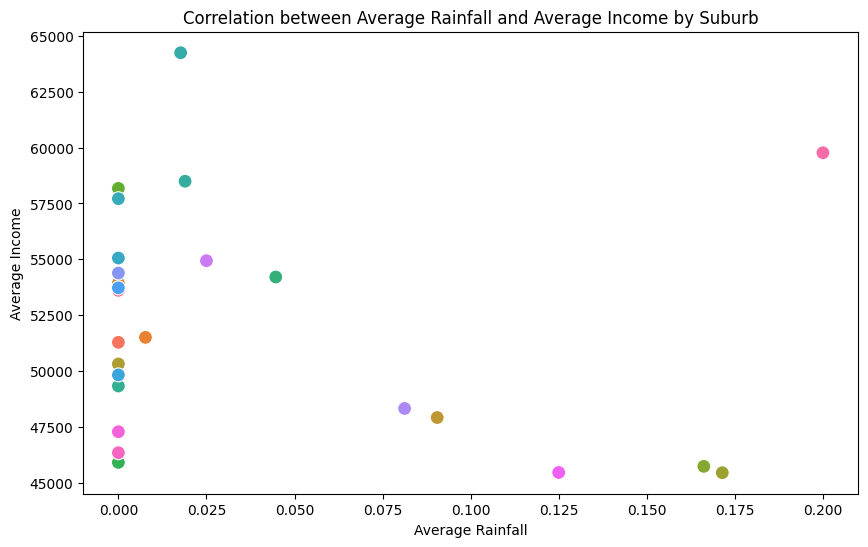

Correlation between Average Rainfall and Average Income: -0.22124555021317094


In [79]:
# Find Correlation between the average weather and average income of the suburb.

mean_data_list = []

for suburb in unique_values:
    # Filter rows for the current suburb
    suburb_data = merged_df_station[merged_df_station['suburb'] == suburb]

    suburb_data['rainfall'] = pd.to_numeric(suburb_data['rainfall'], errors='coerce')
    
    # Calculate mean values for 'rainfall' and 'income'
    mean_rainfall = (suburb_data['rainfall']).mean()
    mean_income = suburb_data['mean_aud'].mean()
    mean_data_list.append({'suburb': suburb, 'mean_rainfall': mean_rainfall, 'mean_income': mean_income})


# Convert the list to a DataFrame for plotting
mean_data_df = pd.DataFrame(mean_data_list)

def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

mean_data_df = remove_outliers(mean_data_df, 'mean_rainfall')
mean_data_df = remove_outliers(mean_data_df, 'mean_income')

# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(x='mean_rainfall', y='mean_income', hue='suburb', data=mean_data_df, s=100)
plt.title('Correlation between Average Rainfall and Average Income by Suburb')
plt.xlabel('Average Rainfall')
plt.ylabel('Average Income')
plt.legend('',frameon=False)
#plt.legend(title='Suburb')
plt.show()

# Drop any rows with NaN values that could have arisen from the mean calculation
mean_data_df.dropna(inplace=True)

# Calculate the Pearson correlation coefficient
correlation = mean_data_df['mean_rainfall'].corr(mean_data_df['mean_income'])

print(f"Correlation between Average Rainfall and Average Income: {correlation}")

In [85]:
# traffic_2023_df

# Merge weather and traffic_2023_df by State
merged_df_state = pd.merge(weather_df, traffic_2023_df, on='State')
unique_values = merged_df_state['State'].unique()
print(unique_values)
merged_df_suburb_income = pd.merge(weather_df, income_df, on='suburb')
unique_values_income = merged_df_suburb_income['suburb'].unique()
print(unique_values_income)

['NSW' 'Vic']
['Wellington' 'Forbes' 'Griffith' 'Walgett' 'Bourke' 'Ballina' 'Mildura'
 'Hunters Hill' 'Coonamble' 'Ararat' 'Ballarat' 'Laverton' 'Warrnambool'
 'Horsham' 'Wagga Wagga' 'Cowra' 'Cobar' 'Richmond' 'Brewarrina' 'Kiama'
 'Penrith' 'Camden' 'Goondiwindi' 'Narrabri' 'Temora' 'Campbelltown'
 'Albury' 'Wangaratta' 'Lithgow' 'Benalla' 'Swan Hill' 'Inverell'
 'Strathbogie' 'Parramatta']


/var/folders/v8/5m92pwd52hj2jgl3z_g3wjlc0000gn/T/ipykernel_56892/1641077826.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_data['rainfall'] = pd.to_numeric(state_data['rainfall'], errors='coerce')


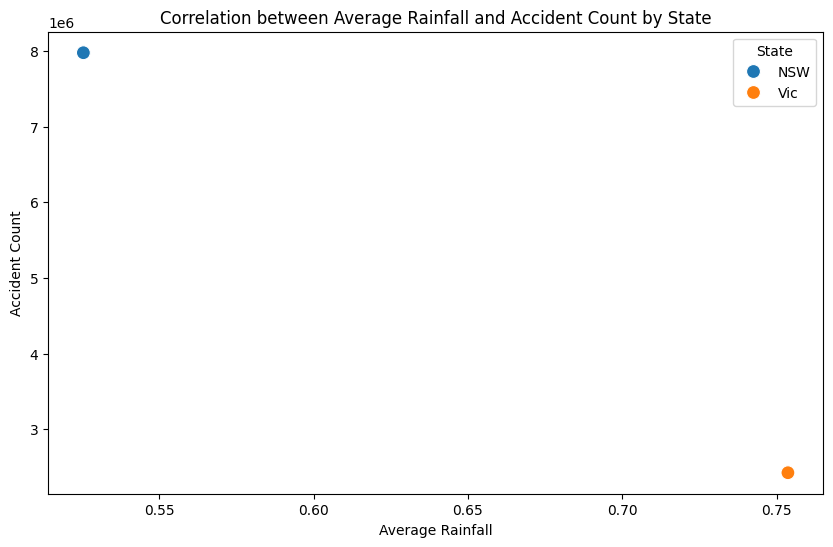

Correlation between Average Rainfall and Accident Count: -1.0


In [70]:
# Find Correlation between the average weather and amount of traffic accidents of one State.

mean_data_list = []

for state in unique_values:
    # Filter rows for the current State
    state_data = merged_df_state[merged_df_state['State'] == state]

    state_data['rainfall'] = pd.to_numeric(state_data['rainfall'], errors='coerce')
    
    # Calculate mean values for 'rainfall' and count of accidents
    mean_rainfall = state_data['rainfall'].mean()
    count_accident = (state_data['State'] == state).sum()
    
    mean_data_list.append({'State': state, 'mean_rainfall': mean_rainfall, 'count_accident': count_accident})

# Convert the list to a DataFrame for plotting
mean_data_df = pd.DataFrame(mean_data_list)

# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(x='mean_rainfall', y='count_accident', hue='State', data=mean_data_df, s=100)
plt.title('Correlation between Average Rainfall and Accident Count by State')
plt.xlabel('Average Rainfall')
plt.ylabel('Accident Count')
plt.legend(title='State')
plt.show()

# Drop any rows with NaN values that could have arisen from the mean calculation
mean_data_df.dropna(inplace=True)

# Calculate the Pearson correlation coefficient
correlation = mean_data_df['mean_rainfall'].corr(mean_data_df['count_accident'])

print(f"Correlation between Average Rainfall and Accident Count: {correlation}")

/var/folders/v8/5m92pwd52hj2jgl3z_g3wjlc0000gn/T/ipykernel_56892/1214518155.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  suburb_data['wind_speed_kmh'] = pd.to_numeric(suburb_data['wind_speed_kmh'], errors='coerce')


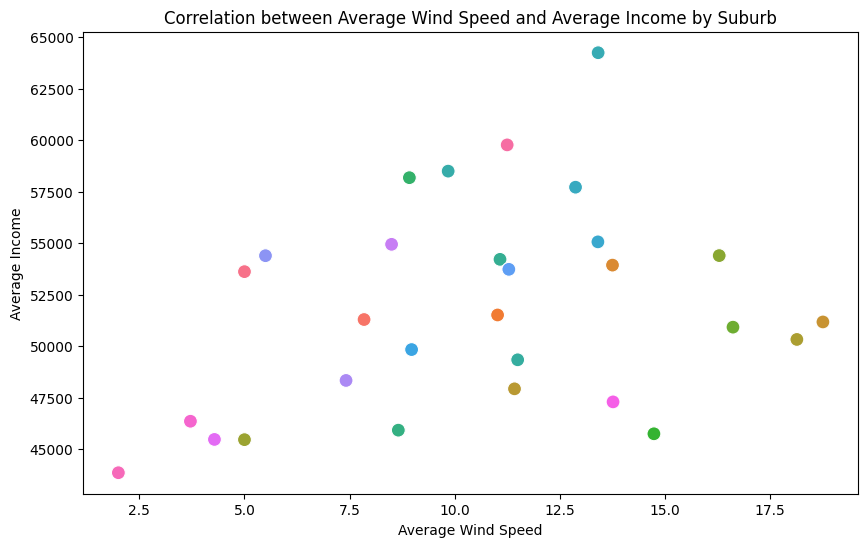

Correlation between Average Wind Speed and Average Income: 0.30025723224982


In [86]:
# Find Correlation between the average wind speed and amount of traffic accidents of the suburb.
merged_df_suburb_income = pd.merge(weather_df, income_df, on='suburb')
unique_values_income = merged_df_suburb_income['suburb'].unique()

# Find Correlation between the average weather and average income of the suburb.

mean_data_list = []

for suburb in unique_values_income:
    # Filter rows for the current suburb
    suburb_data = merged_df_suburb_income[merged_df_suburb_income['suburb'] == suburb]

    suburb_data['wind_speed_kmh'] = pd.to_numeric(suburb_data['wind_speed_kmh'], errors='coerce')
    
    # Calculate mean values for 'rainfall' and 'income'
    mean_wind_speed_kmh = (suburb_data['wind_speed_kmh']).mean()
    mean_income = suburb_data['mean_aud'].mean()
    mean_data_list.append({'suburb': suburb, 'mean_wind_speed_kmh': mean_wind_speed_kmh, 'mean_income': mean_income})


# Convert the list to a DataFrame for plotting
mean_data_df = pd.DataFrame(mean_data_list)

def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

mean_data_df = remove_outliers(mean_data_df, 'mean_wind_speed_kmh')
mean_data_df = remove_outliers(mean_data_df, 'mean_income')

# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(x='mean_wind_speed_kmh', y='mean_income', hue='suburb', data=mean_data_df, s=100)
plt.title('Correlation between Average Wind Speed and Average Income by Suburb')
plt.xlabel('Average Wind Speed')
plt.ylabel('Average Income')
plt.legend('',frameon=False)
#plt.legend(title='Suburb')
plt.show()

# Drop any rows with NaN values that could have arisen from the mean calculation
mean_data_df.dropna(inplace=True)

# Calculate the Pearson correlation coefficient
correlation = mean_data_df['mean_wind_speed_kmh'].corr(mean_data_df['mean_income'])

print(f"Correlation between Average Wind Speed and Average Income: {correlation}")

In [72]:
# Merge weather and traffic_2023_df by Month
merged_df_month = pd.merge(weather_df, traffic_2023_df, on='Month', how='inner')
print(merged_df_month)
unique_values = merged_df_month['Month'].unique()
print(unique_values)

                   suburb history_product  latitude  longitude  temperature  \
0              Green Cape        IDN60801     -37.3      150.1         16.1   
1              Green Cape        IDN60801     -37.3      150.1         16.1   
2              Green Cape        IDN60801     -37.3      150.1         16.1   
3              Green Cape        IDN60801     -37.3      150.1         16.1   
4              Green Cape        IDN60801     -37.3      150.1         16.1   
...                   ...             ...       ...        ...          ...   
4581005  Hopetoun Airport        IDV60801     -35.7      142.4          5.0   
4581006  Hopetoun Airport        IDV60801     -35.7      142.4          5.0   
4581007  Hopetoun Airport        IDV60801     -35.7      142.4          5.0   
4581008  Hopetoun Airport        IDV60801     -35.7      142.4          5.0   
4581009  Hopetoun Airport        IDV60801     -35.7      142.4          5.0   

         apparent_temperature  humidity  wind_speed

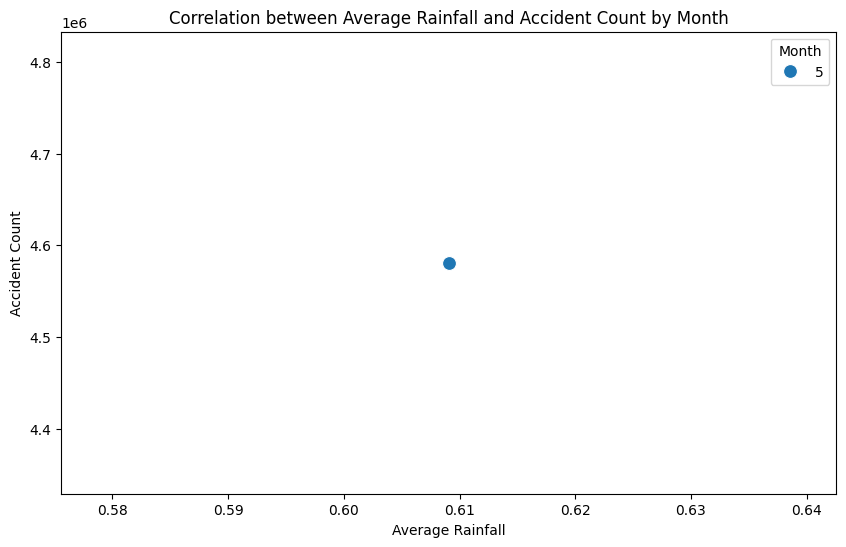

Correlation between Average Rainfall and Accident Count: nan


/Users/jugyeongkim/miniconda3/envs/CloudComputingA2/lib/python3.8/site-packages/numpy/lib/function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Users/jugyeongkim/miniconda3/envs/CloudComputingA2/lib/python3.8/site-packages/numpy/lib/function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


In [73]:
# Find Correlation between the average weather of certain month and amount of traffic accidents of the certain month.

mean_data_list = []

for month in unique_values:
    # Filter rows for the current State
    month_data = merged_df_month[merged_df_month['Month'] == month]

    month_data['rainfall'] = pd.to_numeric(month_data['rainfall'], errors='coerce')
    
    # Calculate mean values for 'rainfall' and count of accidents
    mean_rainfall = month_data['rainfall'].mean()
    count_accident = (month_data['Month'] == month).sum()
    
    mean_data_list.append({'Month': month, 'mean_rainfall': mean_rainfall, 'count_accident': count_accident})

# Convert the list to a DataFrame for plotting
mean_data_df = pd.DataFrame(mean_data_list)

# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(x='mean_rainfall', y='count_accident', hue='Month', data=mean_data_df, s=100)
plt.title('Correlation between Average Rainfall and Accident Count by Month')
plt.xlabel('Average Rainfall')
plt.ylabel('Accident Count')
plt.legend(title='Month')
plt.show()

# Drop any rows with NaN values that could have arisen from the mean calculation
mean_data_df.dropna(inplace=True)

# Calculate the Pearson correlation coefficient
correlation = mean_data_df['mean_rainfall'].corr(mean_data_df['count_accident'])

print(f"Correlation between Average Rainfall and Accident Count: {correlation}")


In [ ]:
# Capitalised the State
traffic_2023_df['State'] = traffic_2023_df['State'].str.upper()

# Get the frequency count of each state
state_counts = traffic_2023_df['State'].value_counts()

# Create a bar plot of the state counts
bars = plt.bar(state_counts.index, state_counts.values)

# Add the frequency count on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.5, yval, ha='center', va='bottom')
plt.title('Frequency of Traffic Accidents in all states')
plt.xlabel('State')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [ ]:
# Create a 'State' column based on the 'lga_code'
income_df['State'] = income_df['lga_code'].apply(lambda x: 'NSW' if str(x).startswith('1') 
                                                 else ('Vic' if str(x).startswith('2') 
                                                 else ('Qld' if str(x).startswith('3') 
                                                 else ('SA' if str(x).startswith('4') 
                                                 else ('WA' if str(x).startswith('5') 
                                                 else ('Tas' if str(x).startswith('6') 
                                                 else ('NT' if str(x).startswith('7') 
                                                #  else ('ACT' if str(x).startswith('8') 
                                                 else 'Other')))))))

# for state in ['VIC', 'NSW']:
#     plt.figure()  # Create a new figure
#     state_df = income_df[income_df['State'] == state]
#     state_df['median_aud'].hist(grid=False)
#     plt.title(f'Distribution of Median Income in {state}')
#     plt.xlabel('Median Income')
#     plt.ylabel('Frequency')
# plt.show()

# Loop through each unique state
for state in income_df['State'].unique():
    plt.figure()  # Create a new figure
    state_df = income_df[income_df['State'] == state]
    state_df['median_aud'].hist(grid=False)
    plt.title(f'Distribution of Median Income in {state}')
    plt.xlabel('Median Income')
    plt.ylabel('Frequency')

plt.show()


vic_median = income_df[income_df['State'] == 'VIC']['median_aud'].median()
nsw_median = income_df[income_df['State'] == 'NSW']['median_aud'].median()
qld_median = income_df[income_df['State'] == 'QLD']['median_aud'].median()
sa_median = income_df[income_df['State'] == 'SA']['median_aud'].median()
wa_median = income_df[income_df['State'] == 'WA']['median_aud'].median()
tas_median = income_df[income_df['State'] == 'TAS']['median_aud'].median()
nt_median = income_df[income_df['State'] == 'NT']['median_aud'].median()
# act_median = income_df[income_df['State'] == 'ACT']['median_aud']

# print(income_df[income_df['State'] == 'ACT']['median_aud'])


# Print the medians
print(f"Median income for VIC: {vic_median}")
print(f"Median income for NSW: {nsw_median}")
print(f"Median income for QLD: {qld_median}")
print(f"Median income for SA: {sa_median}")
print(f"Median income for WA: {wa_median}")
print(f"Median income for TAS: {tas_median}")
print(f"Median income for NT: {nt_median}")
# print(f"Median income for ACT: {act_median}")

# Check the data for ACT
# act_data = income_df[income_df['State'] == 'ACT']
# print(act_data['median_aud'].describe())



In [ ]:
# Calculate the frequency for each state
state_counts = income_df['State'].value_counts()

# Add a column for state counts to the income_df
income_df['Frequency'] = income_df['State'].apply(lambda x: state_counts[x])

# Convert 'State' to categorical codes
income_df['State_Code'] = income_df['State'].astype('category').cat.codes

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the data
scatter = ax.scatter(income_df['State Code'], income_df['Frequency'], income_df['median_aud'])

ax.set_xlabel('State')
ax.set_ylabel('Number of Records')
ax.set_zlabel('Median Income')

# Set the x-tick labels to the 'State' strings
ax.set_xticks(income_df['State_Code'])
ax.set_xticklabels(income_df['State'])
plt.show()

In [ ]:
# Create a grid of x and y values
x = np.linspace(income_df['State_Code'].min(), income_df['State_Code'].max(), len(income_df['State'].unique()))
y = np.linspace(income_df['Frequency'].min(), income_df['Frequency'].max(), 100)
x_grid, y_grid = np.meshgrid(x, y)

z_grid = griddata((income_df['State_Code'], income_df['Frequency']), income_df['median_aud'], (x_grid, y_grid), method='cubic')
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(x_grid, y_grid, z_grid)

ax.set_xlabel('State')
ax.set_ylabel('Number of Records')
ax.set_zlabel('Median Income')

# Show the plot
plt.show()

In [ ]:
state_fatalities = traffic_2023_df.groupby('State')['Number Fatalities'].sum()

# Create a bar plot
state_fatalities.plot(kind='bar', figsize=(10, 7))

# Set the title and labels
plt.title('Frequency of Fatalities by State')
plt.xlabel('State')
plt.ylabel('Frequency of Fatalities')

# Show the plot
plt.show()

In [ ]:
# Convert the 'Number Fatalities' column to numeric
traffic_2023_df['Number Fatalities'] = pd.to_numeric(traffic_2023_df['Number Fatalities'], errors='coerce')
traffic_grouped = traffic_2023_df.groupby('State')['Number Fatalities'].sum()

traffic_state_counts = traffic_2023_df['State'].value_counts()

# Calculate the median of 'median_aud' for each state
income_grouped = income_df.groupby('State')['median_aud'].median()
merged_df = pd.merge(traffic_2023_df, income_df, on='State')

# Calculate the correlation between 'Number Fatalities' and 'median_income'
correlation = merged_df['Number Fatalities'].corr(merged_df['median_aud'])


print(correlation)

plt.scatter(merged_df['median_aud'], merged_df['Number Fatalities'])

plt.axvline(x = 2.5, ymin = 0, ymax = 10, color ='red')
# Set the labels
plt.xlabel('Median Income')
plt.ylabel('Number Fatalities')

# Show the plot
plt.show()



In [ ]:
print(income_df.groupby('State')['median_aud'])